# 5 - Toetsingsprocedures


In [4]:
# Importeren van de nodige packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basis visualisatie
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram
import seaborn as sns                               # Geavanceerde datavisualisatie
import altair as alt                                # Een alternatief visualisatiesysteem


## De z-toets

De $z$-toets probeert een vermoeden over het *populatiegemiddelde* te weerleggen of bevestigen aan de hand van een voldoende grote steekproef.

### De rechtszijdige $z$-toets

Algemeen wordt aangenomen dat superhelden gemiddeld $\mu = 3.3$ mensen per dag redden. Onderzoekers willen dit controleren en voeren een steekproef uit bij 30 superhelden. In deze steekproef is het gemiddelde $\overline{x} = 3.483$. We kunnen dus vermoeden dat superhelden gemiddeld *meer* reddingen uitvoeren.

De standaardafwijking in de populatie is verondersteld gekend en is $\sigma = 0.55$.

De toetsingsprocedure loopt dan als volgt:

**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Stap 2.** Kies significantieniveau, bv. $\alpha = 0.05$

In [1]:
# We hebben een steekproef met
n = 30      # steekproefgrootte
sm = 3.483  # steekproefgemiddelde
s = 0.55    # standaardafwijking (verondersteld gekend)
a = 0.05    # significantieniveau (gekozen door de onderzoeker)
m0 = 3.3    # hypothetisch populatiegemiddelde (H0)

**Stap 3.** Bepaal de waarde van de toetsingsgrootheid, in dit geval $\overline{x} = 3.483$

**Stap 4.** Bepaal de overschrijdingskans $p$ en verwerp $H_0$ als $p < \alpha$.


In [15]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde: 0.03420
p < a, dus H0 verwerpen


Een alternatieve berekeningswijze is het bepalen van het kritieke gebied, d.w.z. het gebied waarbinnen $H_0$ verworpen mag worden. De grens van dat gebied wordt de kritieke grenswaarde $g$ genoemd. Links ervan kan je $H_0$ niet verwerpen (aanvaardingsgebied), rechts ervan wel (kritieke gebied). De oppervlakte van het aanvaardingsgebied is $1 - \alpha$, de oppervlakte van het kritieke gebied $\alpha$.

In [19]:
g = m0 + stats.norm.isf(a) * s / np.sqrt(n)
print("Kritieke grenswaarde g ≃ %.3f" % g)
if (sm < g):
    print("steekproefgemiddelde = %.3f < g = %.3f, H0 niet verwerpen" % (sm, g))
else:
    print("steekproefgemiddelde = %.3f > g = %.3f, H0 verwerpen" % (sm, g))

Kritieke grenswaarde g ≃ 3.465
steekproefgemiddelde = 3.483 > g = 3.465, H0 verwerpen


In [ ]:
Hieronder volgt een grafische weergave van deze casus:

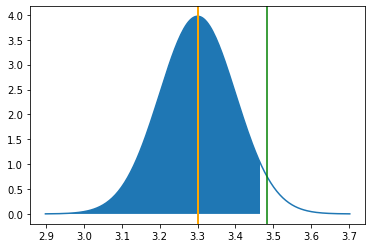

In [24]:
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)     # X-waarden
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))         # Y-waarden voor de Gauss-curve
fig, dplot = plt.subplots(1, 1)
dplot.plot(dist_x, dist_y)                                # Plot de Gauss-curve
dplot.axvline(m0, color="orange", lw=2)                   # Toon het gemiddelde met een oranje lijn
dplot.axvline(sm, color="red")                            # Toon steekproefgemiddelde met een rode lijn
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g)  # Kleur het aanvaardingsgebied blauw in

### De linkszijdige $z$-toets

Stel dat het resultaat van de steekproef $\overline{x} = 3.117$ was. Dan hebben we redenen om aan te nemen dat het populatiegemiddelde *kleiner* is dan 3.3. Dit kunnen we verifi&euml;ren met een linkszijdige $z$-toets.

**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu < 3.3$

**Stap 2.** Kies significantieniveau, bv. $\alpha = 0.05$

In [30]:
# We hebben een steekproef met
n = 30      # steekproefgrootte
sm = 3.117  # steekproefgemiddelde
s = 0.55    # standaardafwijking (verondersteld gekend)
a = 0.05    # significantieniveau (gekozen door de onderzoeker)
m0 = 3.3    # hypothetisch populatiegemiddelde (H0)

**Stap 3.** Bepaal de waarde van de toetsingsgrootheid, in dit geval $\overline{x} = 3.117$

**Stap 4.** Bepaal de overschrijdingskans $p$ en verwerp $H_0$ als $p < \alpha$.

In [31]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n)) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde: 0.03420
p < a, dus H0 verwerpen


De kritieke grenswaarde $g$ ligt nu links van het gemiddelde. Rechts ervan kan je $H_0$ niet verwerpen (aanvaardingsgebied), links ervan wel (kritieke gebied).

In [32]:
g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
print("Kritieke grenswaarde g ≃ %.3f" % g)
if (sm > g):
    print("steekproefgemiddelde = %.3f > g = %.3f, H0 niet verwerpen" % (sm, g))
else:
    print("steekproefgemiddelde = %.3f < g = %.3f, H0 verwerpen" % (sm, g))

Kritieke grenswaarde g ≃ 3.135
steekproefgemiddelde = 3.117 < g = 3.135, H0 verwerpen


We besluiten dus dat als we uitgaan van $H_0$, de kans dat we uit de populatie een steekproef trekken met het bekomen steekproefgemiddelde zeer klein is. We kunnen met het gekozen significantieniveau dan ook de nulhypothese verwerpen.

De plot van dit geval:

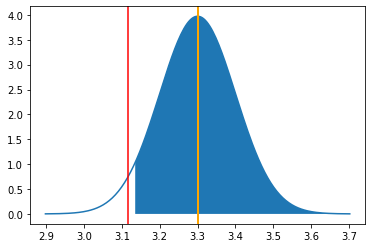

In [33]:
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)     # X-waarden
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))         # Y-waarden voor de Gauss-curve
fig, dplot = plt.subplots(1, 1)
dplot.plot(dist_x, dist_y)                                # Plot de Gauss-curve
dplot.axvline(m0, color="orange", lw=2)                   # Toon het gemiddelde met een oranje lijn
dplot.axvline(sm, color="red")                            # Toon steekproefgemiddelde met een rode lijn
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g)  # Kleur het aanvaardingsgebied blauw in

### De tweezijdige $z$-toets

Hier willen we niet meteen testen of het populatiegemiddelde kleiner dan wel groter is dan een veronderstelde waarde, maar wel of een bekomen steekproefgemiddelde er mee in lijn ligt. 

**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu \ne 3.3$

**Stap 2.** Kies significantieniveau, bv. $\alpha = 0.05$


In [34]:
# We hebben een steekproef met
n = 30      # steekproefgrootte
sm = 3.483  # steekproefgemiddelde
s = 0.55    # standaardafwijking (verondersteld gekend)
a = 0.05    # significantieniveau (gekozen door de onderzoeker)
m0 = 3.3    # hypothetisch populatiegemiddelde (H0)

**Stap 3.** Bepaal de waarde van de toetsingsgrootheid, in dit geval $\overline{x} = 3.483$

**Stap 4.** Bepaal de overschrijdingskans $p$ en verwerp $H_0$ als $p < \alpha/2$ (waarom delen door 2?).

In [36]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < a/2):
    print("p < a/2, dus H0 verwerpen")
else:
    print("p > a/2, dus H0 niet verwerpen")

p-waarde: 0.03420
p > a/2, dus H0 niet verwerpen


Nu zijn er twee kritieke grenswaarden: $g_1$ ligt nu links van het gemiddelde en $g_2$ rechts. Het kritieke gebied vertegenwoordigt nog altijd een oppervlakte van $\alpha$.

In [48]:
g1 = m0 - stats.norm.isf(a/2) * s / np.sqrt(n)
g2 = m0 + stats.norm.isf(a/2) * s / np.sqrt(n)

print("Aanvaardingsgebied [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < sm and sm < g2):
    print("steekproefgemiddelde = %.3f ligt in aanvaardingsgebied, H0 niet verwerpen" % sm)
else:
    print("steekproefgemiddelde = %.3f ligt niet in aanvaardingsgebied, H0 verwerpen" % sm)

Aanvaardingsgebied [g1, g2] ≃ [3.103, 3.497]
steekproefgemiddelde = 3.483 ligt in aanvaardingsgebied, H0 niet verwerpen


De plot van deze situatie ziet er zo uit:


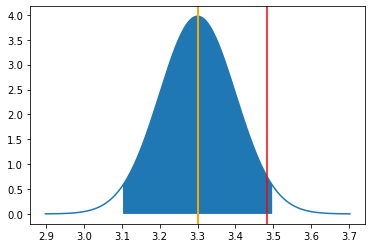

In [49]:
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)     # X-waarden
dist_y = stats.norm.pdf(dist_x, loc=m0, scale=s/np.sqrt(n))         # Y-waarden voor de Gauss-curve
fig, dplot = plt.subplots(1, 1)
dplot.plot(dist_x, dist_y)                                # Plot de Gauss-curve
dplot.axvline(m0, color="orange", lw=2)                   # Toon het gemiddelde met een oranje lijn
dplot.axvline(sm, color="red")                            # Toon steekproefgemiddelde met een rode lijn
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=m0, scale=s/np.sqrt(n))
dplot.fill_between(acc_x, 0, acc_y)  # Kleur aanvaardingsgebied blauw

Als we dus a priori geen uitspraak doen of het werkelijke populatiegemiddelde hetzij kleiner, hetzij groter is, dan blijkt het bekomen steekproefgemiddelde wel voldoende waarschijnlijk te zijn. We kunnen een toevallige steekproeffout niet uitsluiten. Of, met andere woorden, we kunnen hier de nulhypothese dus *niet* verwerpen. 

### Rechtszijdige $t$-toets

Stel dat de onderzoekers van de superhelden door tijdsdruk niet in staat waren om een voldoende grote steekproef te nemen en slechts $n = 20$ observaties gedaan hebben, met hetzelfde steekproefgemiddelde $\overline{x} = 3.483$. De standaardafwijking in deze steekproef bleek $s = 0.55$.

Kunnen we in deze omstandigheden, met eenzelfde significantieniveau $\alpha = 0.05$, het besluit dat superhelden dagelijks *meer* dan 3.3 mensen redden aanhouden?

De toetsingsprocedure loopt dan als volgt:

**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Stap 2.** Kies significantieniveau, bv. $\alpha = 0.05$

In [50]:
# We hebben een steekproef met
n = 20      # steekproefgrootte
sm = 3.483  # gemiddelde van de steekproef
ss = 0.55   # standaardafwijking van de steekproef
a = 0.05    # significantieniveau (gekozen door de onderzoeker)
m0 = 3.3    # hypothetisch populatiegemiddelde (H0)

**Stap 3.** Bepaal de waarde van de toetsingsgrootheid, in dit geval $\overline{x} = 3.483$

**Stap 4.** Bepaal de overschrijdingskans $p$ en verwerp $H_0$ als $p < \alpha$. Merk op dat, omdat de functie `pt` niet toelaat gemiddelde en standaardafwijking mee te geven, we hier de waarden zelf moeten normaliseren.

In [51]:
p = p = stats.t.sf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde: 0.07658
p > a, dus H0 niet verwerpen


Bij de berekening van de kritieke grenswaarde gebruiken we de `isf()`-functie met $n - 1$ vrijheidsgraden.

In [52]:
g = m0 + stats.t.isf(a, df=n-1) * s / np.sqrt(n)
print("Kritieke grenswaarde g ≃ %.3f" % g)
if (sm < g):
    print("steekproefgemiddelde = %.3f < g = %.3f, H0 niet verwerpen" % (sm, g))
else:
    print("steekproefgemiddelde = %.3f > g = %.3f, H0 verwerpen" % (sm, g))

Kritieke grenswaarde g ≃ 3.513
steekproefgemiddelde = 3.483 < g = 3.513, H0 niet verwerpen


De plot voor deze situatie:


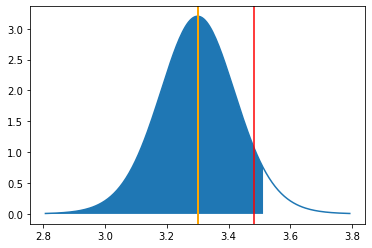

In [54]:
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)     # X-waarden
dist_y = stats.t.pdf(dist_x, loc=m0, scale=s/np.sqrt(n), df=n-1)    # Y-waarden voor de dichtheidscurve
fig, dplot = plt.subplots(1, 1)
dplot.plot(dist_x, dist_y)                                # Plot de Gauss-curve
dplot.axvline(m0, color="orange", lw=2)                   # Toon het gemiddelde met een oranje lijn
dplot.axvline(sm, color="red")                            # Toon steekproefgemiddelde met een rode lijn
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g)  # Kleur het aanvaardingsgebied blauw in

Met andere woorden, ook al krijgen we gelijkaardige resultaten in onze steekproef, kunnen we niet hetzelfde besluit trekken. Omdat onze steekproef te klein is, is er grotere onzekerheid of de waarde van het steekproefgemiddelde extreem genoeg is om de nulhypothese te verwerpen.

### Gebruik van de functie `ttest_1samp()`

SciPy voorziet een functie `ttest_1samp()` waarmee je een *tweezijdige* t-toets kan uitvoeren op een verzameling van observaties:

In [60]:
observaties = [
  3, 2, 3, 1, 10, 4, 2, 7, 3, 0,
  3, 1, 2, 3,  4, 0, 3, 8, 3, 7]
a = 0.05
m0 = 3.3

t_stat, p_val = stats.ttest_1samp(observaties, m0)
print("Steekproefgemiddelde: %.3f" % np.mean(observaties))
print("t-score             : %.3f" % t_stat)
print("p-waarde (2-zijdig) : %.5f" % p_val)
print("p-waarde (1-zijdig) : %.5f" % (p_val/2))

Steekproefgemiddelde: 3.450
t-score             : 0.254
p-waarde (2-zijdig) : 0.80253
p-waarde (1-zijdig) : 0.40127


De correcte besluiten voor een links- of rechtszijdige t-toets kan je hier altijd uit afleiden. De t-score zal negatief zijn als het steekproefgemiddelde links van m0 ligt. In dat geval zou je een linkszijdige toets uitvoeren.  Bij een éénzijdige toets delen we verder $p$ door 2 en vergelijken dan met $\alpha$. Het besluit wordt dan:

- Bij een rechtszijdige toets: als $p/2 < \alpha$ en $t > 0$ kunnen we de nulhypothese verwerpen
- Bij een linkszijdige toets: als $p/2 < \alpha$ en $t < 0$ kunnen we de nulhypothese verwerpen

Het besluit is hier dat het steekproefgemiddelde van 3.45 hier nog geen aanleiding is voor het verwerpen van de nulhypothese omdat de overschrijdingskans $p \approx 0.401$  groter is dan het significantieniveau $\alpha = 0.05$.
